# **Miniproyecto 3:** Exploración de datos
__________________________________________

# Insurance Lead Prediction Raw Data

El objetivo de este proyecto es lograr clasificar los clientes en dos categorias (clasificación binaria): Posibles clientes y no posibles clientes. Para ello se utilizará una base de datos pertenecientes a una compañia de seguros (datos anónimos) y algoritmos de clasificación de tipo no-supervisado(K-Means) y supervisado(Random Forest). La base de datos contiene los siguientes atributos:

- **ID Unique:** Identifier for a row
- **City_Code:** Code for the City of the customers
- **Region_Code:** Code for the Region of the customers
- **Accomodation_Type:** Customer Owns or Rents the house
- **Reco_Insurance_Type:** Joint or Individual type for the recommended insurance
- **Upper_Age:** Maximum age of the customer
- **Lower_Age:** Minimum age of the customer
- **Is_Spouse:** If the customers are married to each other (in case of joint insurance)
- **Health_Indicator:**	Encoded values for health of the customer
- **Holding_Policy_Duration:** Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
- **Holding_Policy_Type:** Type of holding policy
- **Reco_Policy_Cat:** Encoded value for recommended health insurance
- **Reco_Policy_Premium Annual:** Premium (INR) for the recommended health insurance
- **Response (Target):** 0 = Customer did not show interest in the recommended policy, 1 = Customer showed interest in the recommended policy

Como candidato a vector de clasificación (label) se utilizará el atributo 'Response', el cual será evaluado en función de los demás atributos a lo largo de este proyecto.


Fuente: https://www.kaggle.com/datasets/owaiskhan9654/health-insurance-lead-prediction-raw-data

Bibliografía: Practical Statistcs for Data Scientists. Bruce P., Bruce A & Gedeck P. O'REILLY. 2da Edition





# 1. Importar librerías

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# 2. Cargar archivo

In [3]:
df = pd.read_csv('HealthInsuranceLeadPredictionRawData.csv', sep=',')

In [4]:
df.head(10)

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   
5   6        C9         1785            Rented          Individual         52   
6   7        C3          679             Owned          Individual         28   
7   8        C1         3175             Owned               Joint         75   
8   9       C15         3497             Owned               Joint         52   
9  10        C1          530             Owned               Joint         59   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                       1   
3         48        No               X1                     14+   
4         44        No               X2                       3   
5         52        No               X2                       5   
6         28        No              NaN                     NaN   
7         73       Yes               X4                       9   
8         43        No               X1                      14   
9         26       Yes              NaN                       7   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0  
5                  1.0               22              15264.0         1  
6                  NaN               17              10640.0         0  
7                  4.0               17              29344.0         1  
8                  3.0                1              27283.2         0  
9                  4.0               18              21100.8         1

# 3. Revisión del dataset

3.1 Revisión de los atributos

In [5]:
df.columns.tolist()

['ID',
 'City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

3.2 Número de filas y atributos

In [6]:
df.shape

(50882, 14)

3.3 Datos estadísticos

In [7]:
df.describe(include='all')

ID City_Code   Region_Code Accomodation_Type  \
count   50882.000000     50882  50882.000000             50882   
unique           NaN        36           NaN                 2   
top              NaN        C1           NaN             Owned   
freq             NaN      8973           NaN             27951   
mean    25441.500000       NaN   1732.788707               NaN   
std     14688.512535       NaN   1424.081652               NaN   
min         1.000000       NaN      1.000000               NaN   
25%     12721.250000       NaN    523.000000               NaN   
50%     25441.500000       NaN   1391.000000               NaN   
75%     38161.750000       NaN   2667.000000               NaN   
max     50882.000000       NaN   6194.000000               NaN   

       Reco_Insurance_Type     Upper_Age     Lower_Age Is_Spouse  \
count                50882  50882.000000  50882.000000     50882   
unique                   2           NaN           NaN         2   
top             Individual           NaN           NaN        No   
freq                 40536           NaN           NaN     42460   
mean                   NaN     44.856275     42.738866       NaN   
std                    NaN     17.310271     17.319375       NaN   
min                    NaN     18.000000     16.000000       NaN   
25%                    NaN     28.000000     27.000000       NaN   
50%                    NaN     44.000000     40.000000       NaN   
75%                    NaN     59.000000     57.000000       NaN   
max                    NaN     75.000000     75.000000       NaN   

       Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
count             39191                   30631         30631.000000   
unique                9                      15                  NaN   
top                  X1                       1                  NaN   
freq              13010                    4499                  NaN   
mean                NaN                     NaN             2.439228   
std                 NaN                     NaN             1.025923   
min                 NaN                     NaN             1.000000   
25%                 NaN                     NaN             1.000000   
50%                 NaN                     NaN             3.000000   
75%                 NaN                     NaN             3.000000   
max                 NaN                     NaN             4.000000   

        Reco_Policy_Cat  Reco_Policy_Premium      Response  
count      50882.000000         50882.000000  50882.000000  
unique              NaN                  NaN           NaN  
top                 NaN                  NaN           NaN  
freq                NaN                  NaN           NaN  
mean          15.115188         14183.950069      0.239947  
std            6.340663          6590.074873      0.427055  
min            1.000000          2280.000000      0.000000  
25%           12.000000          9248.000000      0.000000  
50%           17.000000         13178.000000      0.000000  
75%           20.000000         18096.000000      0.000000  
max           22.000000         43350.400000      1.000000

3.4 Datos únicos por atributo

In [8]:
df.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

3.5 Datos NA por atributo

In [9]:
pd.isna(df).sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

3.6 Tipos de datos por atributo

In [10]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

# 4. Preprocesamiento

4.1 Eliminación de datos NA

Dado que el dataset contiene una gran cantidad de datos (50.882 filas), se elige eliminar las filas con datos NA. De esta manera, el dataset disminuye en un 53.8%. A pesar, de esta significativa reducción, la cantidad de datos del nuevo dataset es más que suficiente para la aplicación de modelos de machine learning.

In [11]:
df = df.dropna()
print(df.isna().sum())
print('===========================')
print('Número de filas y atributos')
df.shape

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64
Número de filas y atributos


(23548, 14)

4.2 Label Encoder de los atributos de tipo objeto

In [12]:
df_ = df.copy()

columns_ = df.select_dtypes(include = "object").columns

labelencoder = LabelEncoder()

for col in columns_:
    df_[col] = labelencoder.fit_transform(df_[col])

df_.head()

ID  City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  \
0   1         22         3213                  1                    0   
3   4         16         4378                  0                    1   
4   5         34         2190                  1                    0   
5   6         35         1785                  1                    0   
7   8          0         3175                  0                    1   

   Upper_Age  Lower_Age  Is_Spouse  Health Indicator  Holding_Policy_Duration  \
0         36         36          0                 0                        6   
3         52         48          0                 0                        6   
4         44         44          0                 1                        8   
5         52         52          0                 1                       10   
7         75         73          1                 3                       14   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0  
5                  1.0               22              15264.0         1  
7                  4.0               17              29344.0         1

In [13]:
df_.dtypes

ID                           int64
City_Code                    int32
Region_Code                  int64
Accomodation_Type            int32
Reco_Insurance_Type          int32
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int32
Health Indicator             int32
Holding_Policy_Duration      int32
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

4.3 Distribución de los datos según atributo

Se observa que para el atributo 'Response', la categoría 0 corresponde aproximadamente al 80% de los datos totales, mientras que la categoría 1 corresponde al 20% del total de datos. Es importante destacar este hecho, dado que este sesgo en los datos podría afectar el rendimiento de los algoritmos de clasificación.

- City_Code:

<AxesSubplot: xlabel='City_Code', ylabel='Count'>

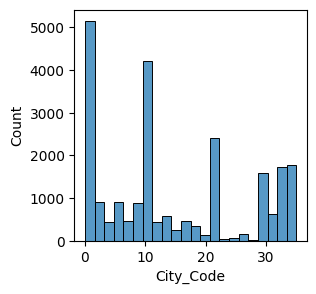

In [14]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='City_Code')

- Region_Code:

<AxesSubplot: xlabel='Region_Code', ylabel='Count'>

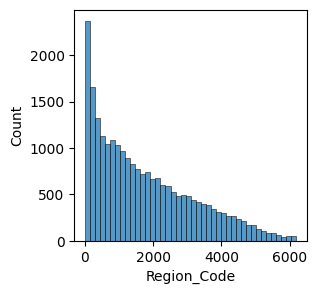

In [15]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Region_Code')

- Accomodation_Type:

<AxesSubplot: xlabel='Accomodation_Type', ylabel='Count'>

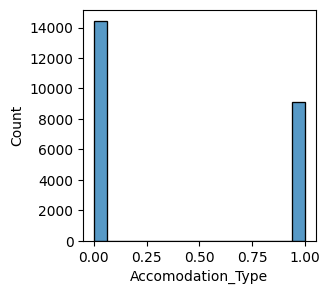

In [16]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Accomodation_Type')

- Reco_Insurance_Type:

<AxesSubplot: xlabel='Reco_Insurance_Type', ylabel='Count'>

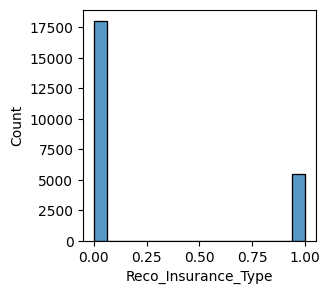

In [17]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Reco_Insurance_Type')

- Upper_Age:

<AxesSubplot: xlabel='Upper_Age', ylabel='Count'>

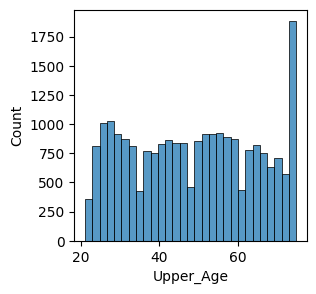

In [18]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Upper_Age')

- Lower_Age:

<AxesSubplot: xlabel='Lower_Age', ylabel='Count'>

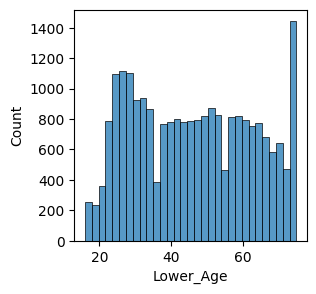

In [19]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Lower_Age')

- Is_Spouse:

<AxesSubplot: xlabel='Is_Spouse', ylabel='Count'>

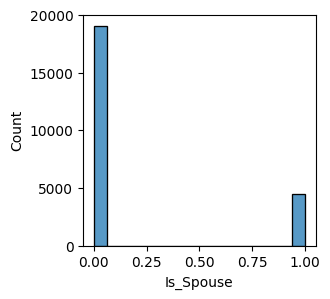

In [20]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Is_Spouse')

- Health Indicator:

<AxesSubplot: xlabel='Health Indicator', ylabel='Count'>

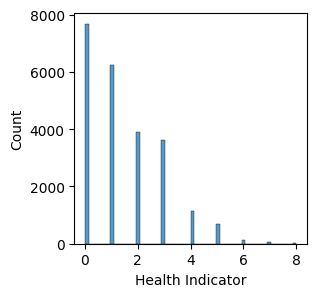

In [21]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Health Indicator')

- Holding_Policy_Duration:

<AxesSubplot: xlabel='Holding_Policy_Duration', ylabel='Count'>

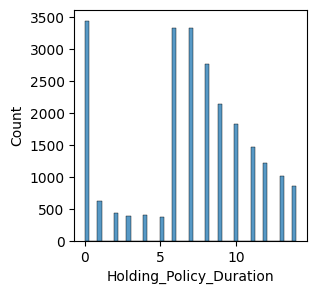

In [22]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Holding_Policy_Duration')

- Holding_Policy_Type:

<AxesSubplot: xlabel='Holding_Policy_Type', ylabel='Count'>

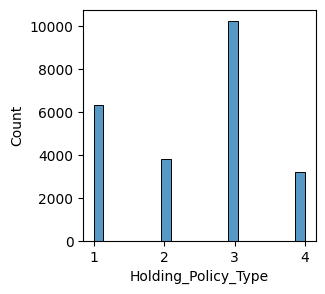

In [23]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Holding_Policy_Type')

- Reco_Policy_Cat:

<AxesSubplot: xlabel='Reco_Policy_Cat', ylabel='Count'>

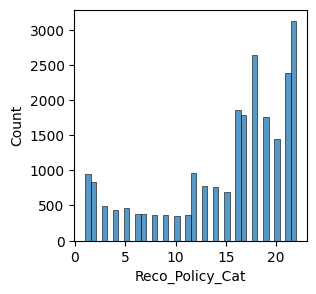

In [24]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Reco_Policy_Cat')

- Reco_Policy_Premium:

<AxesSubplot: xlabel='Reco_Policy_Premium', ylabel='Count'>

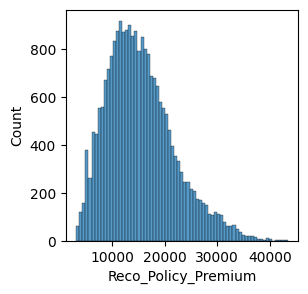

In [25]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Reco_Policy_Premium')

- Response:

<AxesSubplot: xlabel='Response', ylabel='Count'>

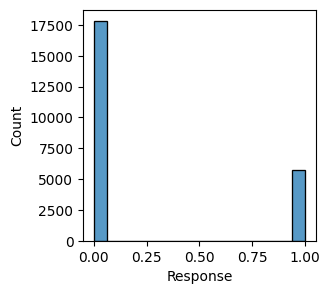

In [26]:
plt.subplots(figsize=(3,3))
sns.histplot(data=df_, x='Response')

4.4 Comportamiento de los atributos en función de 'Response'

Al graficar todos los atributos en función de 'Response', se observa un cierto patrón de comportamiento en el atributo 'Reco_Policy_Premium'. Podemos ver que para la categoría 0 el valor de la poliza abarca entre 0 y 45.000 (aprox.), mientras que para la categoría 1 los valores están entre 0 y 40.000 (aprox.)

- Gráfico 'City_Code' vs 'Response'

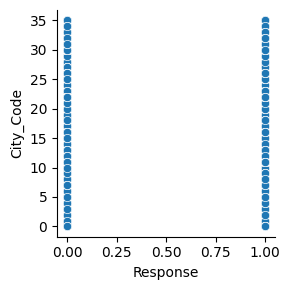

In [27]:
sns.relplot(data=df_, x='Response', y='City_Code', height=3)

- Gráfico 'Region_Code' vs 'Response'

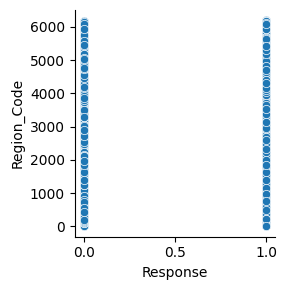

In [28]:
sns.relplot(data=df_, x='Response', y='Region_Code', height=3)

- Gráfico 'Accomodation_Type' vs 'Response'

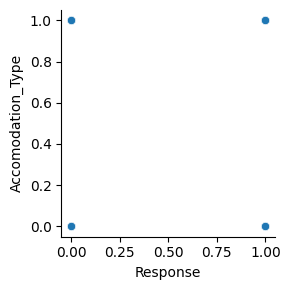

In [29]:
sns.relplot(data=df_, x='Response', y='Accomodation_Type', height=3)

- Gráfico 'Reco_Insurance_Type' vs 'Response'

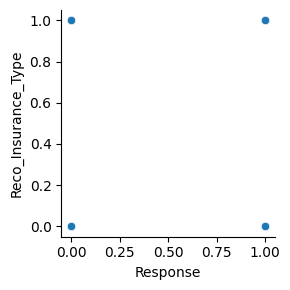

In [30]:
sns.relplot(data=df_, x='Response', y='Reco_Insurance_Type', height=3)

- Gráfico 'Upper_Age' vs 'Response'

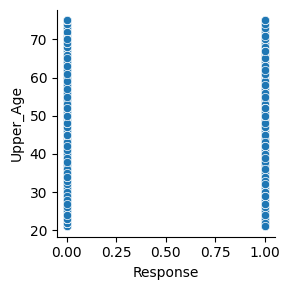

In [31]:
sns.relplot(data=df_, x='Response', y='Upper_Age', height=3)

- Gráfico 'Lower_Age' vs 'Response'

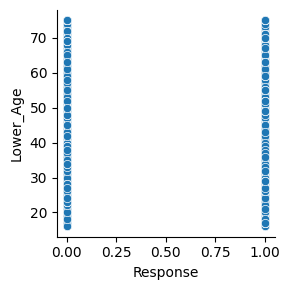

In [32]:
sns.relplot(data=df_, x='Response', y='Lower_Age', height=3)

- Gráfico 'Is_Spouse' vs 'Response'

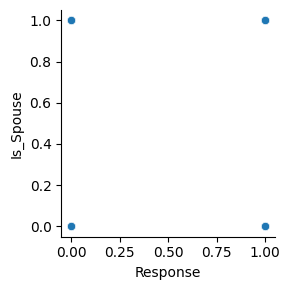

In [33]:
sns.relplot(data=df_, x='Response', y='Is_Spouse', height=3)

- Gráfico 'Health Indicator' vs 'Response'

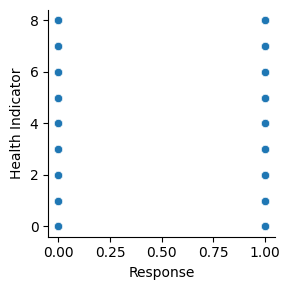

In [34]:
sns.relplot(data=df_, x='Response', y='Health Indicator', height=3)

- Gráfico 'Holding_Policy_Duration' vs 'Response'

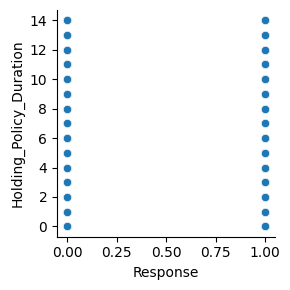

In [35]:
sns.relplot(data=df_, x='Response', y='Holding_Policy_Duration', height=3)

- Gráfico 'Holding_Policy_Type' vs 'Response'

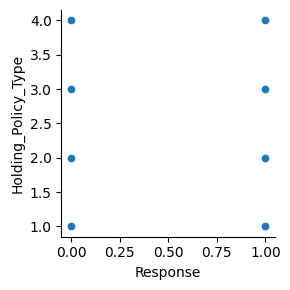

In [36]:
sns.relplot(data=df_, x='Response', y='Holding_Policy_Type', height=3)

- Gráfico 'Reco_Policy_Cat' vs 'Response'

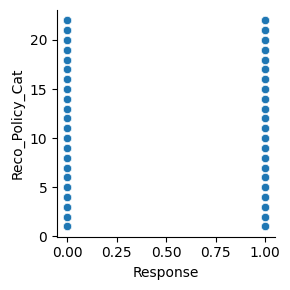

In [37]:
sns.relplot(data=df_, x='Response', y='Reco_Policy_Cat', height=3)

- Gráfico 'Reco_Policy_Premium' vs 'Response'

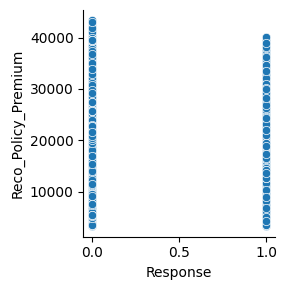

In [38]:
sns.relplot(data=df_, x='Response', y='Reco_Policy_Premium', height=3)

4.5 Separación matriz de atributos y vector de clasificación (label)

- **x** contiene los valores de los atributos 'City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium Annual'
- **y** contiene los valores del atributo 'Response'

In [39]:
x= df_.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
y= df_.iloc[:,13].values

4.6 Normalización

Para la Normalización se ocupa StandarScaler (función: z = (x - u) / s) dado que los algoritmos de aprendizaje no supervisado y supervisado se comportan de mejor manera con esta estandarización.

In [40]:
x= StandardScaler().fit_transform(x)
x

array([[ 0.61282305,  1.03168412,  1.26105277, ...,  0.54823047,
         1.0737853 , -0.58929046],
       [ 0.11620112,  1.84307634, -0.79298822, ...,  0.54823047,
         0.59954293,  0.36953386],
       [ 1.60606691,  0.31919121,  1.26105277, ..., -1.40129098,
         0.12530057, -0.78005784],
       ...,
       [-1.20812402, -0.89824534,  1.26105277, ..., -1.40129098,
        -0.50702258, -0.6288778 ],
       [-1.20812402, -1.20330096, -0.79298822, ..., -0.42653026,
         0.12530057,  1.99030853],
       [ 0.61282305,  1.48648165,  1.26105277, ...,  0.54823047,
         0.44146215, -0.62108502]])

4.7 Principal Component Analysys (PCA)

Dado que el dataset contiene una gran cantidad de atributos, es necesario reducir la dimensión de los datos mediante PCA. 

- Seleccionar el número de componentes que expliquen entre 80 - 90 % de la varianza acumulada (según lo descrito en la bibliografía).

In [41]:
pca_ = PCA(n_components=12)
pca_.fit_transform(x)


array([[-1.65681541,  0.11415492, -0.19453883, ...,  0.06327968,
        -0.1175357 , -0.01177795],
       [ 1.01471583,  0.51629462,  0.60820273, ...,  0.70960156,
         1.15812015, -0.87587541],
       [-1.70950375, -0.16155814,  0.94863482, ..., -0.28163275,
         0.17113323,  0.04211945],
       ...,
       [-0.31426483, -1.32122533, -0.33572092, ..., -0.71445743,
         0.55747897,  0.11970777],
       [ 2.5380761 ,  0.083945  , -0.90200707, ...,  1.71003669,
         0.83249464, -0.28791213],
       [-2.2675532 ,  0.8094397 ,  0.29935514, ...,  0.41348975,
        -0.40576539, -0.05920536]])

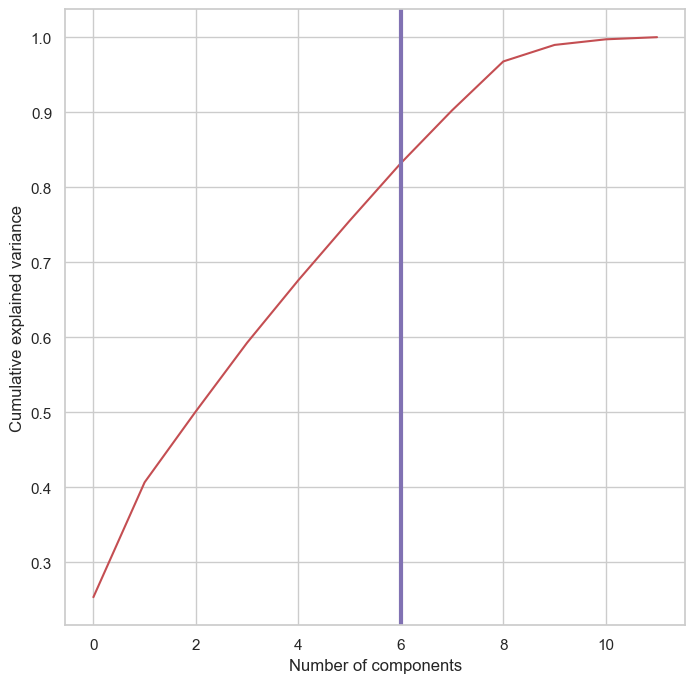

In [42]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(8,8))
plt.plot(np.cumsum(pca_.explained_variance_ratio_), 'r-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axvline(linewidth=3, color='m', linestyle= '-', x=6, ymin=0, ymax=1)

In [43]:
explvarr = pca_.explained_variance_ratio_
cumvarr = np.cumsum(pca_.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cumvarr
pca_df['Explained Variance Ratio'] = explvarr
pca_df


Cumulative Variance Ratio  Explained Variance Ratio
0                    0.253566                  0.253566
1                    0.406674                  0.153108
2                    0.501282                  0.094607
3                    0.592728                  0.091446
4                    0.676061                  0.083333
5                    0.755267                  0.079206
6                    0.832023                  0.076756
7                    0.902448                  0.070424
8                    0.967662                  0.065214
9                    0.989660                  0.021998
10                   0.997145                  0.007485
11                   1.000000                  0.002855

In [44]:
pca_df.iloc[6]

Cumulative Variance Ratio    0.832023
Explained Variance Ratio     0.076756
Name: 6, dtype: float64

- Reducción dimensionalidad matriz de atributos mediante PCA

Se selecciona el número de componentes = 6, ya que muestra una Varianza acumulada del 83% (por sobre el umbral = 80%, y menor a 90%).

In [45]:
x_pca = PCA(n_components=6).fit_transform(x)
x_pca.shape


(23548, 6)

4.8 Análisis con t-SNE

Antes de aplicar los modelos de clasificación, se aplica t-SNE tanto a la matriz de atributos original (**x**) como a la matriz de atributos obtenida con PCA (**x_pca**) para observar como se distribuyen los datos en 2 dimensiones. Además con esta visualización, se apunta a encontrar posibles clusters que puedan dar algún indicio de clasificación antes de aplicar los modelos de K-Means y Random Forest.

En resumen, aplicando t-SNE se observa que los datos estan distribuidos en varios clusters para **x** y en dos bien definidos cluster para la **x_pca**. Para ambos casos, el vector de clasificación se distribuye de manera homogenea en cada uno de los clusters, sugiriendo que el atributo 'Response' podría ser un mal clasificador. No obstante, se rescata el resultado del t-SNE para **x_pca**, ya que indica que los datos podrían estar clasificados con otra etiqueta distinta a 'Response'. 

En consecuencia, se elige **x_pca** como matriz de atributo que se ocupará como input en los modelos K-Means y Random Forest.

- Utilizando la matriz de atributos original

In [46]:
x_embedded = TSNE(n_components=2).fit_transform(x)
x_embedded.shape

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(23548, 2)

In [47]:
tabla1 = pd.DataFrame(x_embedded, columns=['tsne1', 'tsne2'])
tabla1['Response'] = y
tabla1.head()

tsne1      tsne2  Response
0  29.688931 -64.642609         0
1  66.402130   7.128273         0
2  22.261745 -29.284492         0
3  22.116560 -30.161055         1
4  33.261200  25.624323         1

Text(0.5, 0, 'tsne 2')

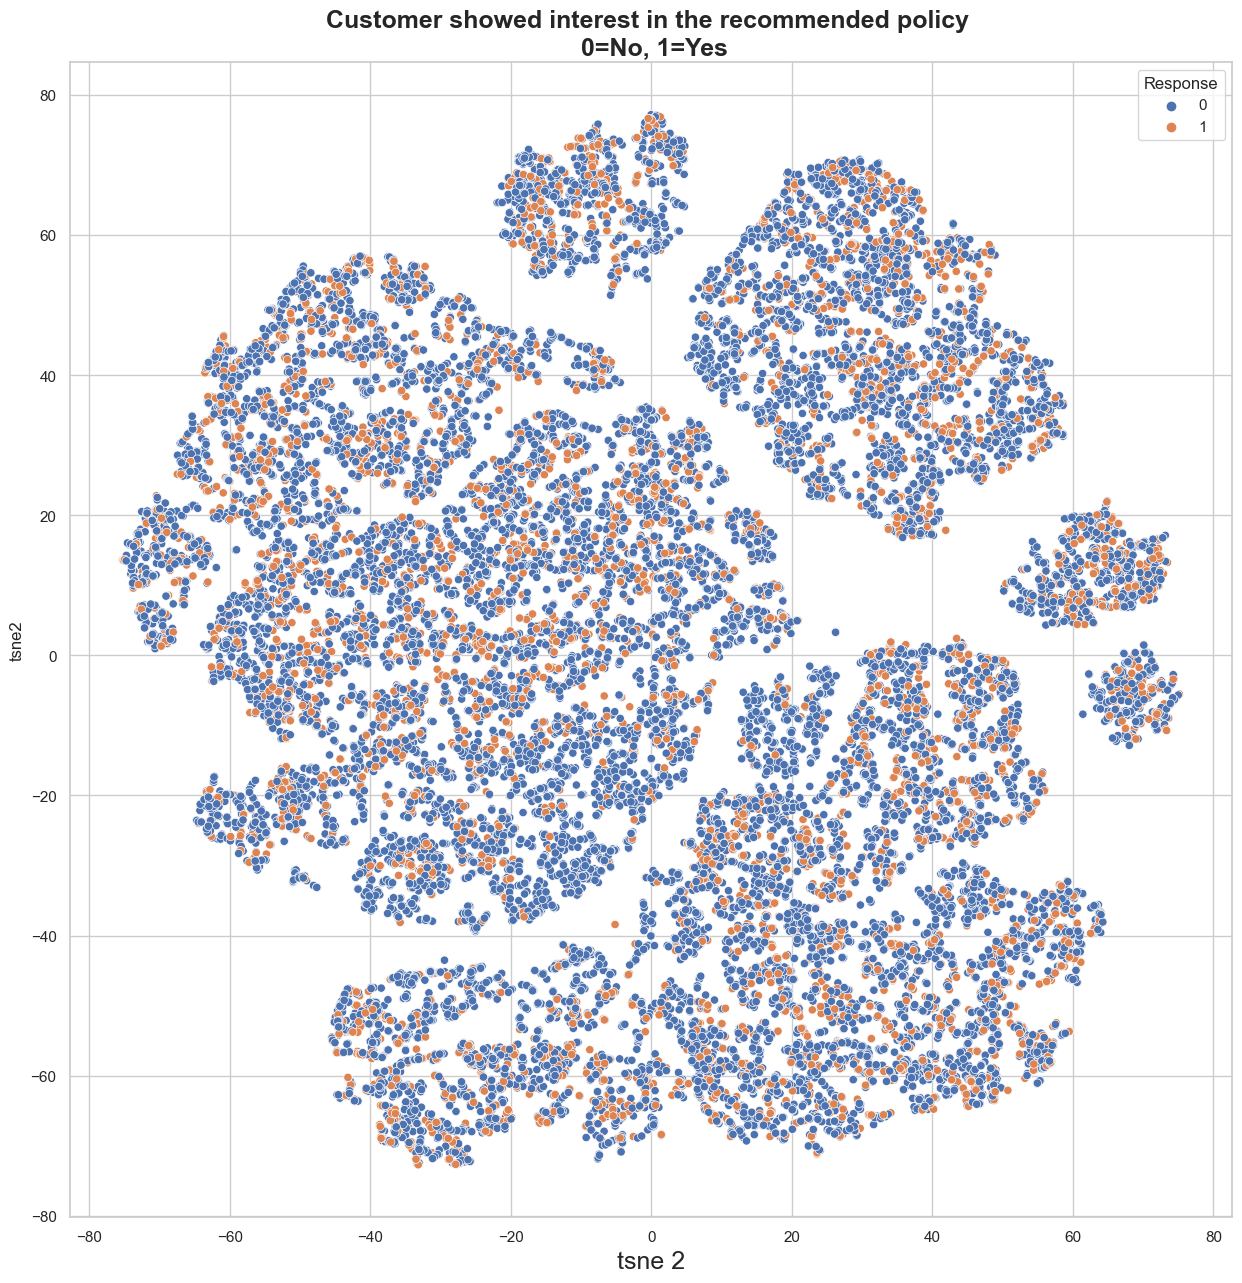

In [48]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla1, x='tsne1', y='tsne2', hue='Response')
plt.title('Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

- Utilizando matriz de atributos PCA

In [49]:
x_embedded_pca = TSNE(n_components=2).fit_transform(x_pca)
x_embedded_pca.shape

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(23548, 2)

In [50]:
tabla2 = pd.DataFrame(x_embedded_pca, columns=['tsne1', 'tsne2'])
tabla2['Response'] = y
tabla2.head()

tsne1      tsne2  Response
0 -63.510796 -14.861062         0
1  43.148045  17.556950         0
2 -11.862003 -26.614128         0
3 -20.416451  15.050626         1
4  62.937965 -40.495647         1

Text(0.5, 0, 'tsne 2')

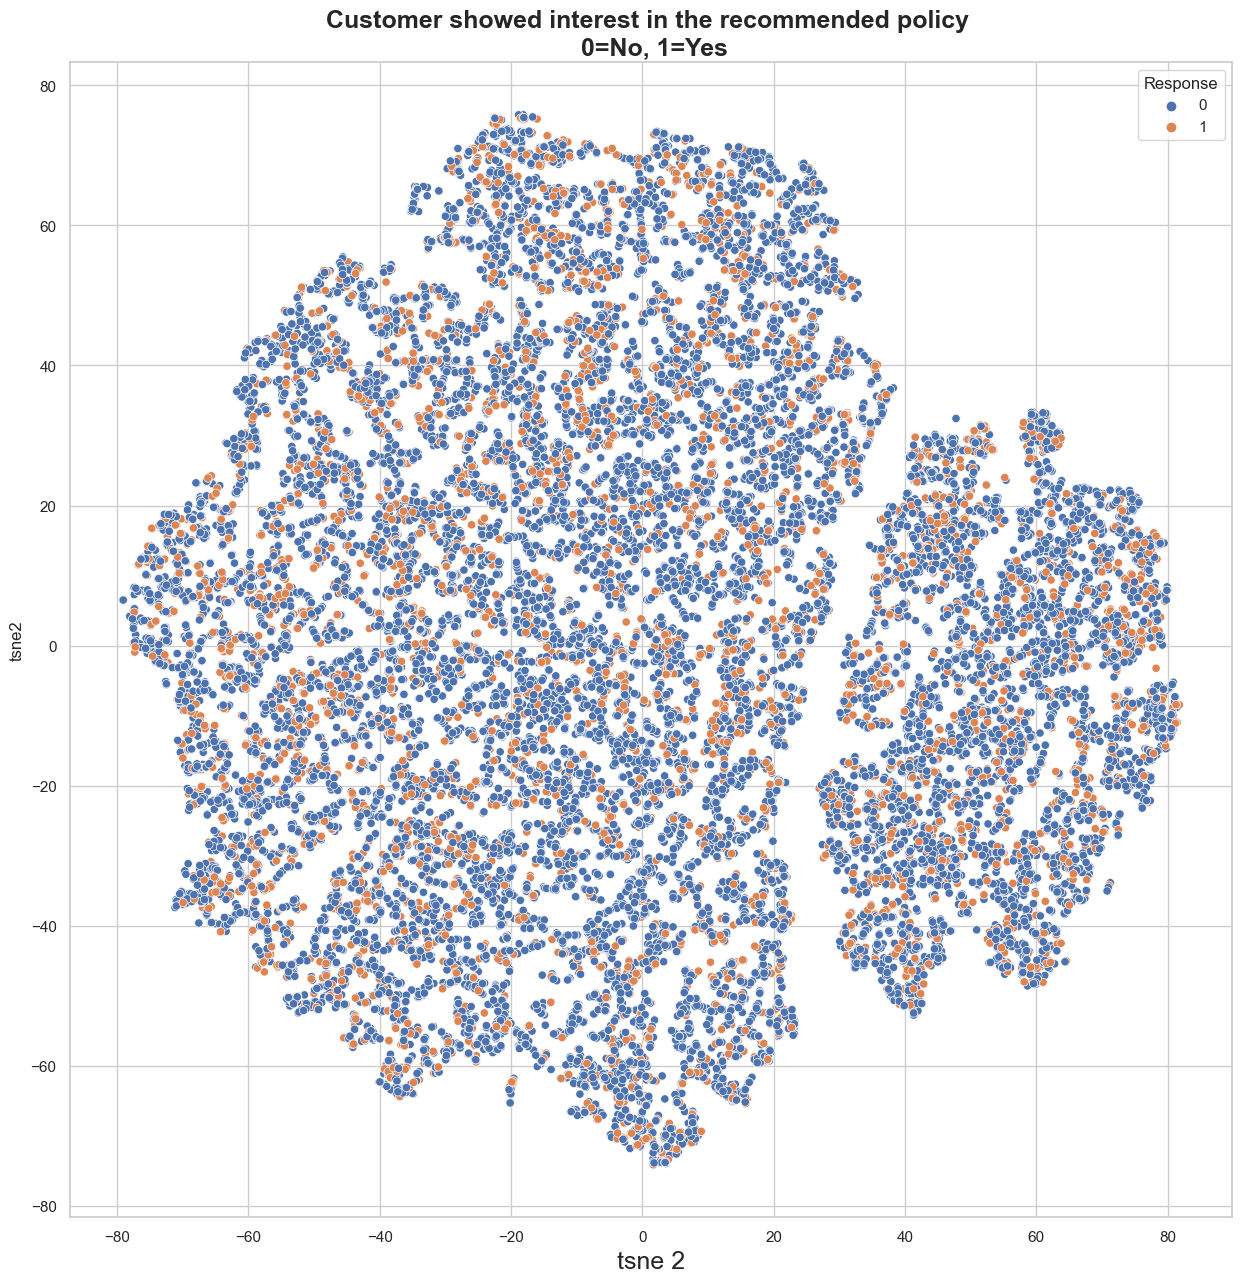

In [51]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla2, x='tsne1', y='tsne2', hue='Response')
plt.title('Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

4.9 Dividir dataset en trainig y testing set

Se selecciona 70% training y 30% testing del datset, dado que se tienen suficientes datos

In [52]:
x_traine, x_teste, y_traine, y_teste = train_test_split(x_pca, y, test_size=0.30)

# 5. Modelo K-Means

Para buscar la mejor accuracy del modelo se realizaron 3 experimentos. Luego, se eligió el con mejor accuracy para informar las métricas y realizar la visualización del algoritmo.

5.1 Modelo con n_cluster=2, init='random. Se dejan los valores default de los demás parámetros

In [82]:
'Hiperparámetro'
clusters= 2

'Modelo'
kmeans_ = KMeans(n_clusters=clusters, init='random')

'Entrenamiento'
kmeans_.fit(x_traine)

'Predicción'
y_pred_ekmeans_ = kmeans_.predict(x_teste)

'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_pred_ekmeans_)*100),'%')

Accuracy: 36.037 %


5.2 Modelo con n_clusters=2, init='k-means++'. Se dejan default los demás parámetros

In [54]:
'Hiperparámetro'
clusters= 2

'Modelo'
kmeans_init_ = KMeans(n_clusters=clusters, init='k-means++')

'Entrenamiento'
kmeans_init_.fit(x_traine)

'Predicción'
y_pred_ekmeans_init = kmeans_init_.predict(x_teste)

'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_pred_ekmeans_init)*100),'%')

Accuracy: 36.037 %


5.3 Modelo con n_clusters=2, init='k-means++', max_iter=700. Se dejan default los demás parámetros

In [55]:
'Hiperparámetro'
clusters= 2

'Modelo'
kmeans_maxiter_ = KMeans(n_clusters=clusters, init='k-means++', max_iter=700)

'Entrenamiento'
kmeans_maxiter_.fit(x_traine)

'Predicción'
y_pred_ekmeans_maxiter = kmeans_maxiter_.predict(x_teste)

'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_pred_ekmeans_maxiter)*100),'%')

Accuracy: 63.963 %


5.4 Métricas de precisión, recall y F1-Score

Para informar las métricas de evaluación, se selecciona el experimento del punto 5.3: Modelo con n_clusters=clusters, init='k-means++', max_iter=700.

Se observa que para la clase **Response 0** los valores de precision, recall, f1-score y support son significativamente mejores en comparación a la clase **Response 1**, por lo que podemos concluir, para este caso, que el modelo se comporta mejor con el input de datos de **Response 0**.

In [56]:
target_names = ['Response {0}'.format(i) for i in df_['Response'].unique()]
print(classification_report(y_teste, y_pred_ekmeans_maxiter, target_names=target_names))

              precision    recall  f1-score   support

  Response 0       0.75      0.77      0.76      5321
  Response 1       0.25      0.23      0.24      1744

    accuracy                           0.64      7065
   macro avg       0.50      0.50      0.50      7065
weighted avg       0.63      0.64      0.63      7065



In [57]:
confusion_matrix(y_teste, y_pred_ekmeans_maxiter)

array([[4117, 1204],
       [1342,  402]], dtype=int64)

5.5 Visualización K-Means

Dado que la matriz de testeo tiene 6 dimensiones (**x_teste**) se utiliza t-SNE para reducir las dimensiones en 2 (de manera similar a lo realizado a **x_pca** en el punto 4.8) y lograr visualizar el resultado de K-Means en 2D. Luego, se muestran dos gráficos: la predicción de clasificación de K-Means y los datos originales.

Según lo observado en las gráficas, podemos notar que K-Means identificó claramente dos clusters de datos, siendo **Response 0** más grande que **Response 1**. Sin embargo, si comparamos con los datos originales, la clasificación de K-Means no coicide con los datos reales, lo cual sugiere fuertemente que el atributo 'Response' no es un buen clasificador. No obstante, K-Means confirma lo visto con t-SNE, en relación a que los datos se clasifican en dos grupos.

In [58]:
print(x_teste.shape)
print(y_teste.shape)

(7065, 6)
(7065,)


In [59]:
x_embedded_x_teste = TSNE(n_components=2).fit_transform(x_teste)
x_embedded_x_teste.shape

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(7065, 2)

In [60]:
tabla3 = pd.DataFrame(x_embedded_x_teste, columns=['tsne1', 'tsne2'])
tabla3['Response Prediction'] = y_pred_ekmeans_maxiter
tabla3['Response True'] = y_teste
tabla3.head()

tsne1      tsne2  Response Prediction  Response True
0  -1.770852  20.495533                    0              0
1 -31.534868 -46.307415                    0              0
2 -32.183403 -45.255722                    0              0
3 -47.443935 -41.642712                    0              0
4  38.363136  13.443750                    0              0

Text(0.5, 0, 'tsne 2')

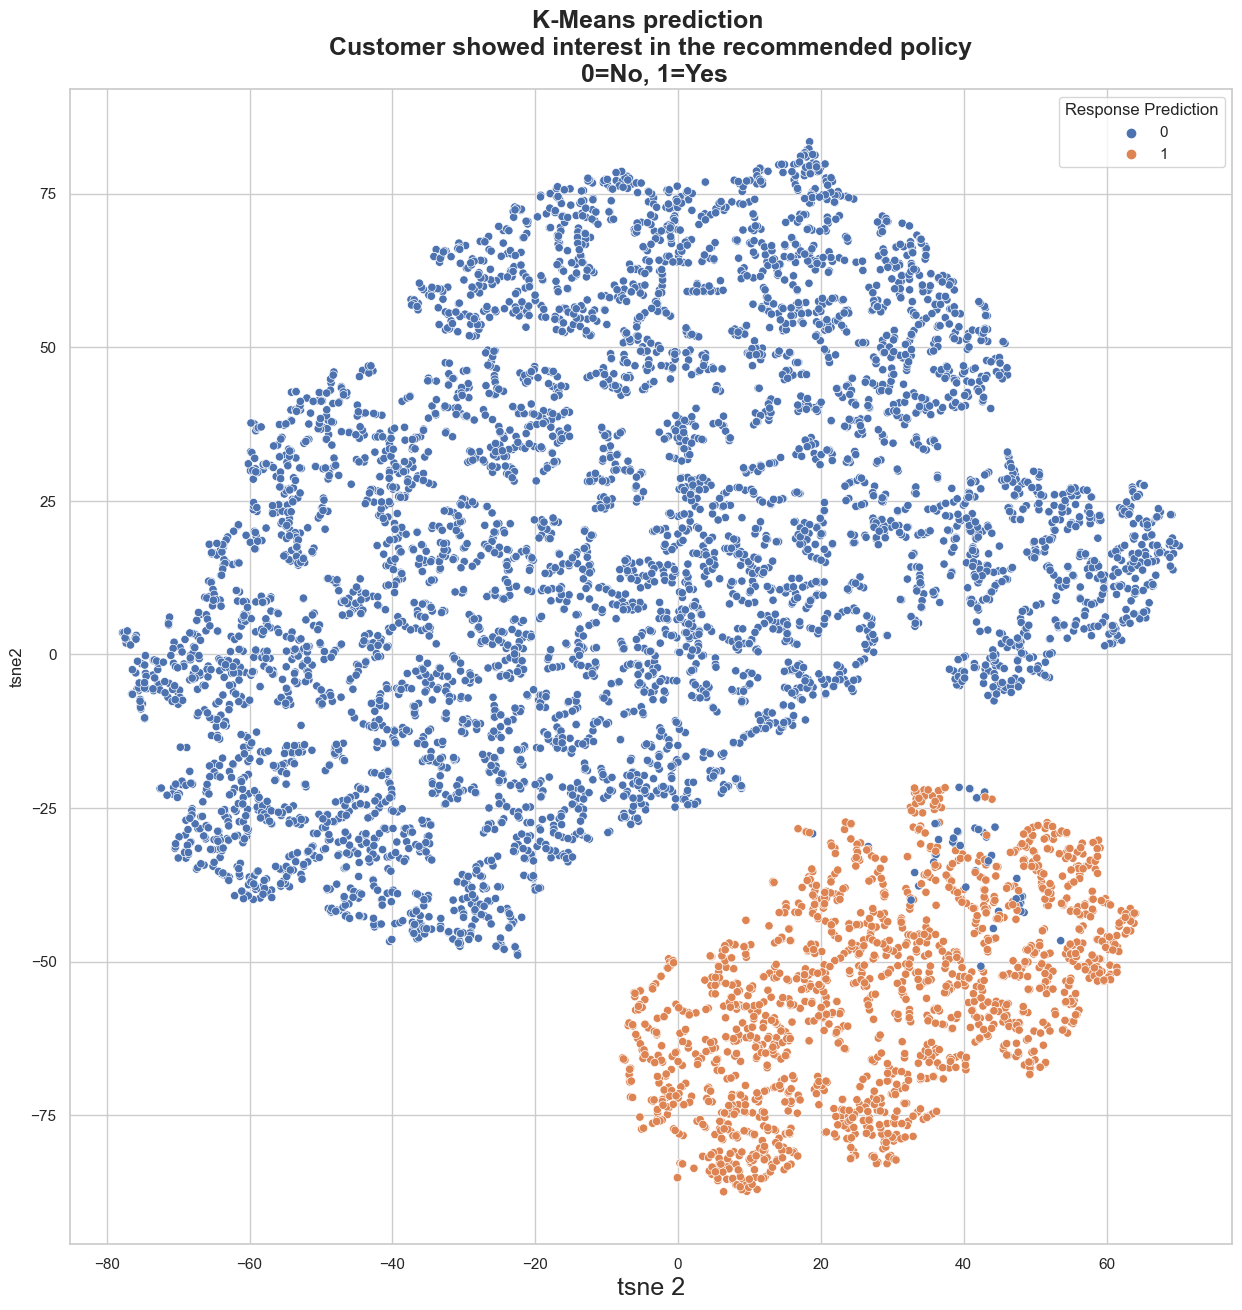

In [61]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla3, x='tsne1', y='tsne2', hue='Response Prediction')
plt.title('K-Means prediction \n Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

Text(0.5, 0, 'tsne 2')

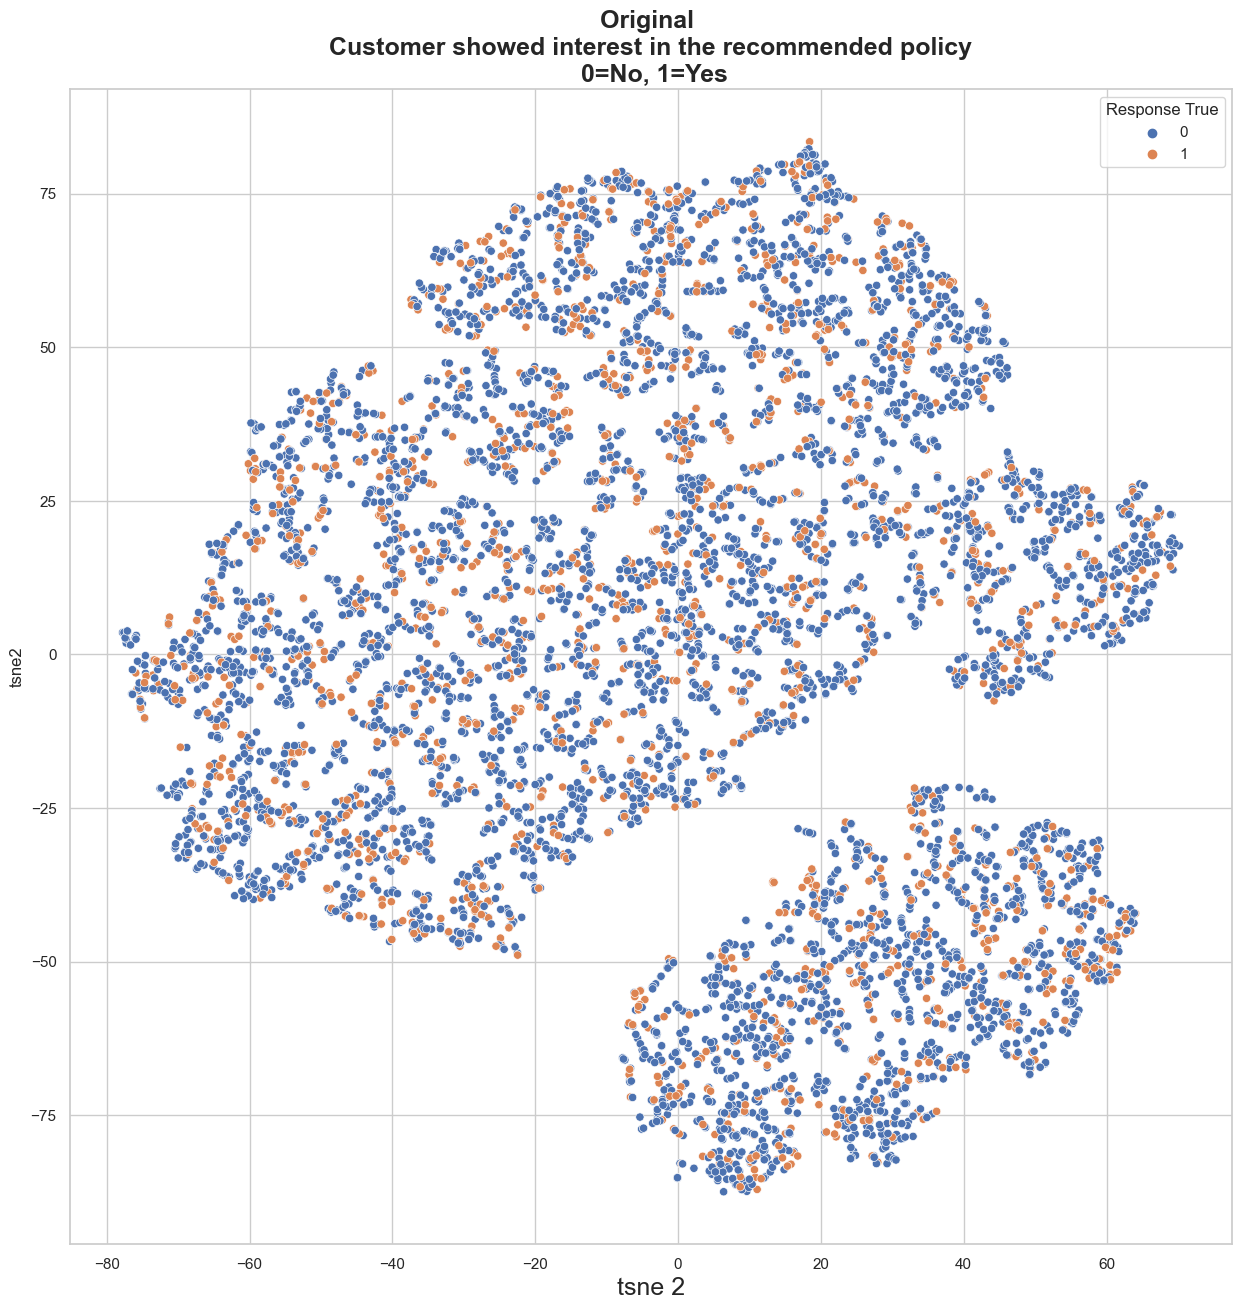

In [62]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla3, x='tsne1', y='tsne2', hue='Response True')
plt.title('Original \n Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

# 6. Modelo Random Forest

Para buscar la mejor accuracy del modelo se realizaron 3 experimentos. Luego, se eligió el con mejor accuracy para informar las métricas y realizar la visualización del algoritmo.

6.1 Modelo con n_estimators=200, criterion='gini', max_depth=10. Se dejan los valores default de los demás parámetros

In [63]:
'Modelo'
clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10)
'Entrenamiento'
clf.fit(x_traine,y_traine)
'Predicción'
y_predRF = clf.predict(x_teste)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_predRF)*100),'%')

Accuracy: 75.315 %


6.2 Modelo con n_estimators=50, criterion='entropy', max_depth=10. Se dejan los valores default de los demás parámetros

In [64]:
'Modelo'
clf_criterion = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=10)
'Entrenamiento'
clf_criterion.fit(x_traine,y_traine)
'Predicción'
y_predRF_criterion = clf_criterion.predict(x_teste)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_predRF_criterion)*100),'%')

Accuracy: 75.301 %


6.3 Modelo con n_estimators=50, criterion='gini', max_depth=10. Se dejan los valores default de los demás parámetros

In [65]:
'Modelo'
clf_maxdepth = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=10)
'Entrenamiento'
clf_maxdepth.fit(x_traine,y_traine)
'Predicción'
y_predRF_maxdepth = clf_maxdepth.predict(x_teste)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_teste, y_predRF_maxdepth)*100),'%')

Accuracy: 75.272 %


6.4 Importancia de las Features

Para la importancia de las features se elige el modelo Random Forest con mejor Accuracy (75,315 %), este corresponde a aquel con los siguiente seteo de parámetros: Modelo con n_estimators=200, criterion='gini', max_depth=10 (Ver punto 6.1).

Se observa que la importancia de las Features esta bastante equilibrada, con excepción de la Feature 2. Esta diferencia es más notoria al observar el gráfico.

- Dataframe de la importancia de las Features

In [66]:
name_ = [0, 1, 2, 3, 4, 5]
importance_ = []

for importance in clf.feature_importances_:
    importance_.append(importance)

featI = pd.DataFrame(importance_, columns=['FeatureValue'])
featI['FeatureName'] = name_
featI = featI.sort_values(by='FeatureValue', ascending=False)
featI

FeatureValue  FeatureName
2      0.246916            2
3      0.155015            3
4      0.151868            4
0      0.149603            0
5      0.148974            5
1      0.147624            1

- Gráfico de la importancia de las Features

Text(0.5, 1.0, 'Features Importance')

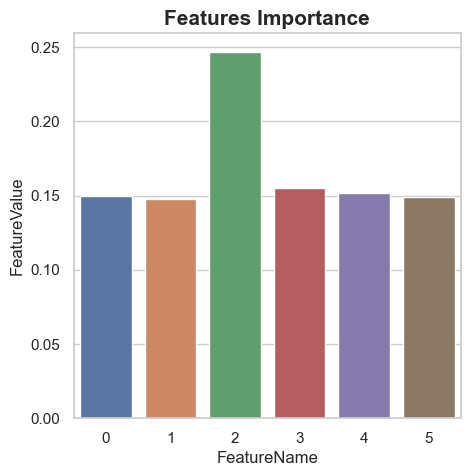

In [67]:
plt.figure(figsize=(5,5))
sns.barplot(x='FeatureName', y='FeatureValue', data=featI)
plt.title('Features Importance', weight='bold', fontsize=15)

6.5 Métricas de precisión, recall y F1-Score

Para informar las métricas de evaluación, se selecciona el experimento del punto 6.1: Modelo con n_estimators=200, criterion='gini', max_depth=10.

Se observa que para la clase **Response 0** los valores de precision, recall, f1-score y support son mejores en comparación a la clase **Response 1**. No obstante, la diferencia entre estos valores no es tan amplia a la encontrada para K-Means. Dado los resultados, es posible decir que el modelo Random Forest se comporta mejor con el input de datos de **Response 0** y con valores aceptables para **Response 1**.

In [68]:
target_names = ['Response {0}'.format(i) for i in df_['Response'].unique()]
print(classification_report(y_teste, y_predRF, target_names=target_names))

              precision    recall  f1-score   support

  Response 0       0.75      1.00      0.86      5321
  Response 1       0.50      0.00      0.00      1744

    accuracy                           0.75      7065
   macro avg       0.63      0.50      0.43      7065
weighted avg       0.69      0.75      0.65      7065



In [69]:
confusion_matrix(y_teste, y_predRF)

array([[5320,    1],
       [1743,    1]], dtype=int64)

6.6 Visualización árbol Random Forest

- Nota: la resolución de la imagen se seteo baja para poder correr el programa en mi computadora

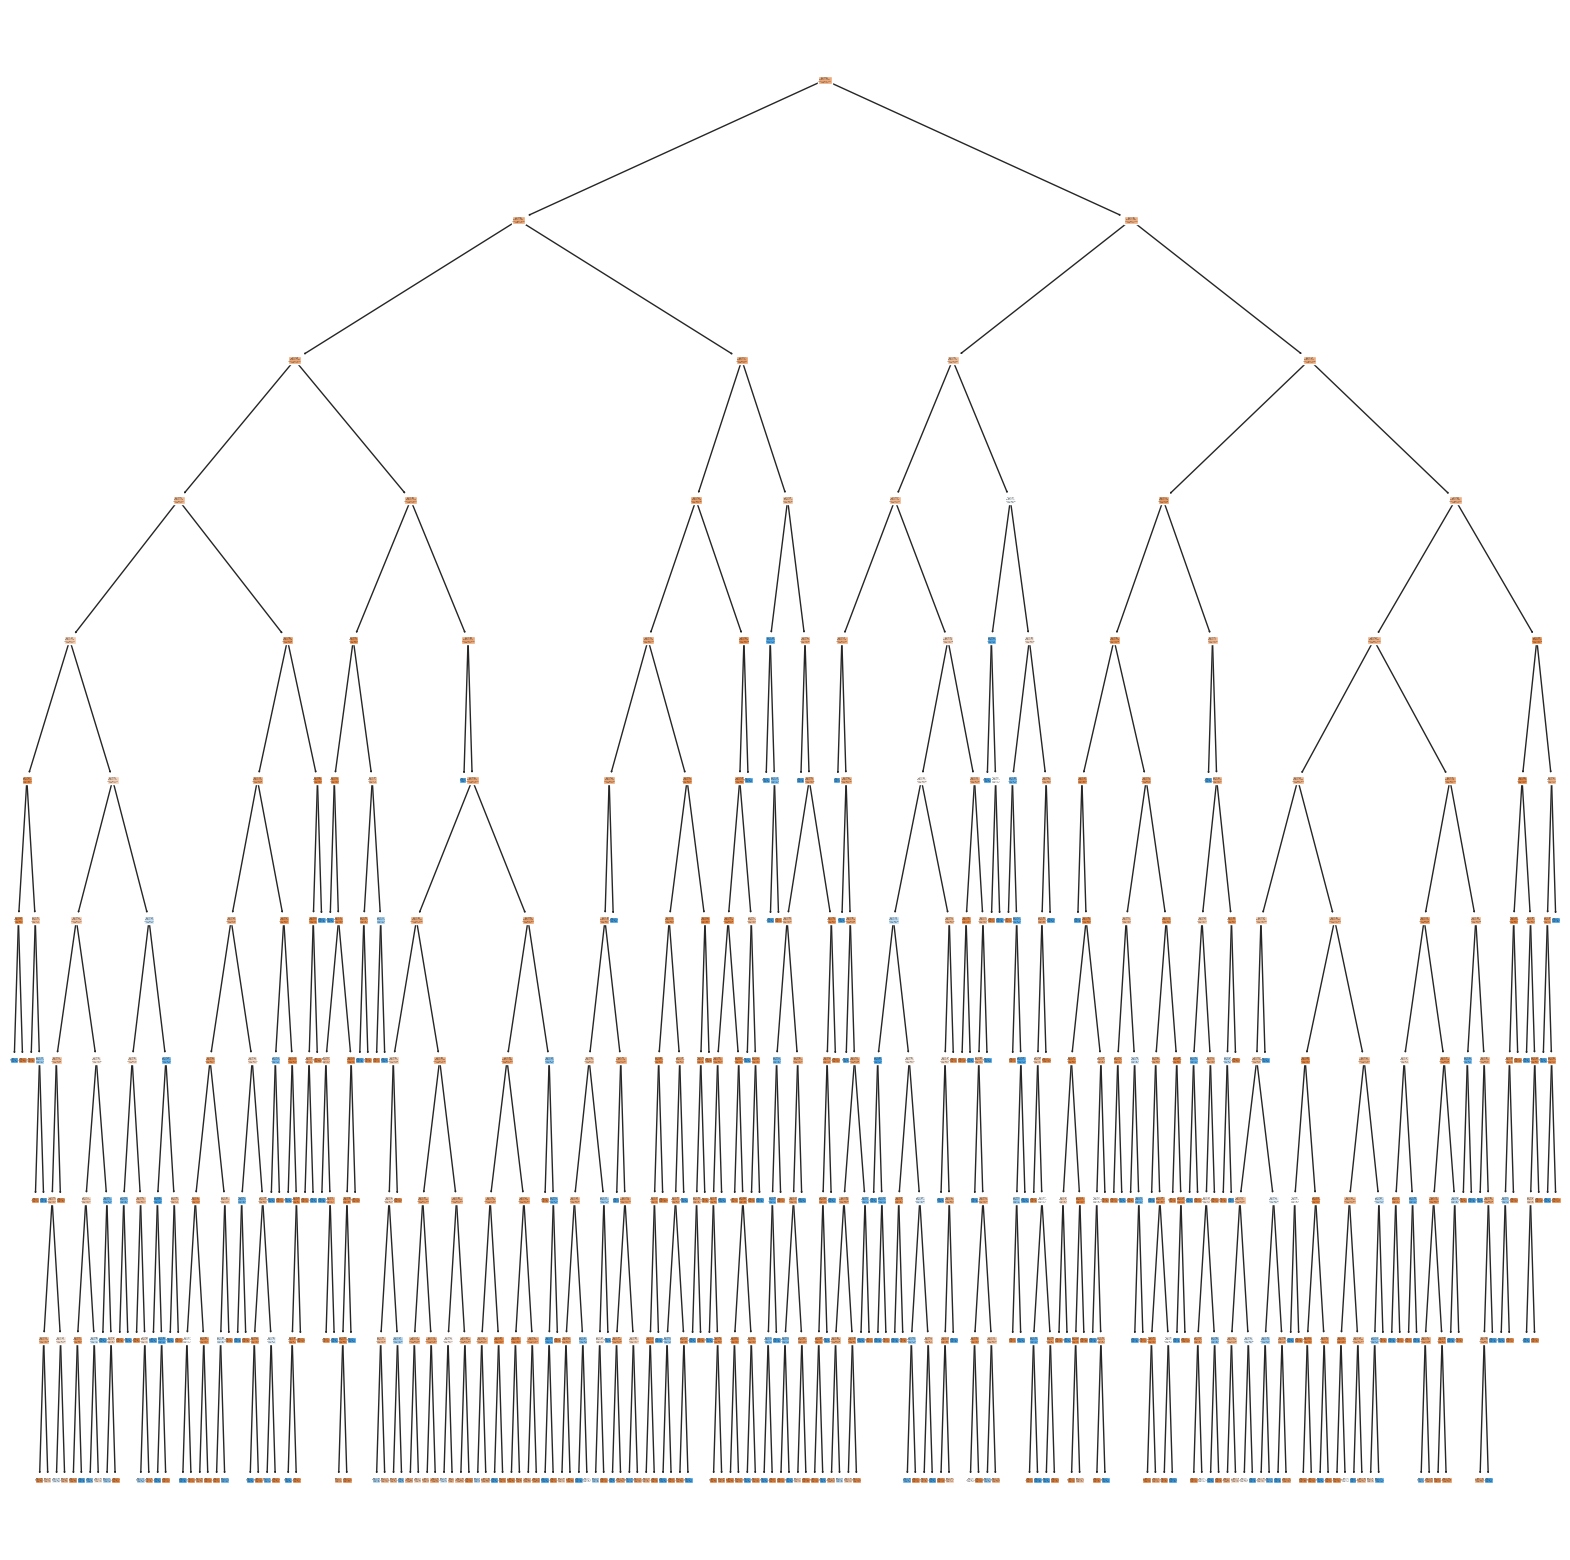

In [70]:
fn = name_
cn = ['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=100)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);


6.7 Visualización Random Forest con t-SNE

Con el fin de comparar mejor los resultados entre modelos, se gráfica la predicción de Random Forest en 2 dimensiones, tal cual se realizó para K-Means. Se muestran dos gráficos: la predicción de clasificación de Random Foresty los datos originales.

Se puede observar que Random Forest predice de mejor manera el comportamiento del label 'Response' que K-Means con respecto al gráfico de los datos originales. No obstante, Random Forest no logra clasificar, claramente con el atributo 'Response', los dos clusters de datos que se observan en la imagen.

In [71]:
tabla4 = pd.DataFrame(x_embedded_x_teste, columns=['tsne1', 'tsne2'])
tabla4['Response Prediction'] = y_predRF
tabla4['Response True'] = y_teste
tabla4.head()

tsne1      tsne2  Response Prediction  Response True
0  -1.770852  20.495533                    0              0
1 -31.534868 -46.307415                    0              0
2 -32.183403 -45.255722                    0              0
3 -47.443935 -41.642712                    0              0
4  38.363136  13.443750                    0              0

Text(0.5, 0, 'tsne 2')

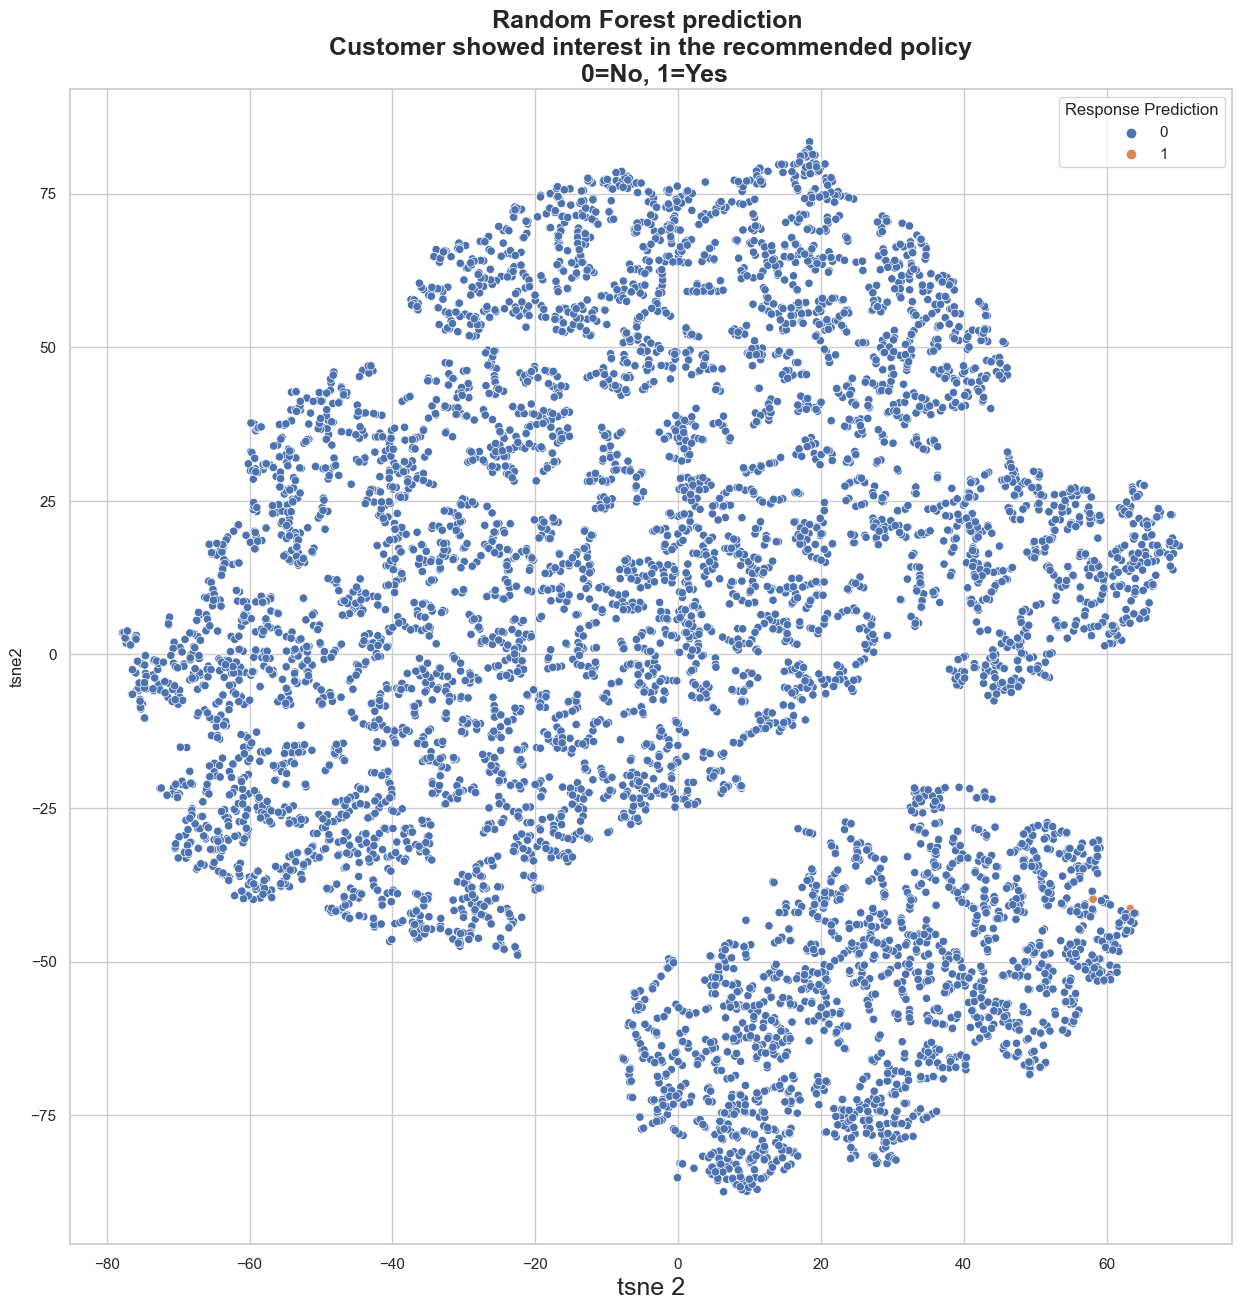

In [72]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla4, x='tsne1', y='tsne2', hue='Response Prediction')
plt.title('Random Forest prediction \n Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

Text(0.5, 0, 'tsne 2')

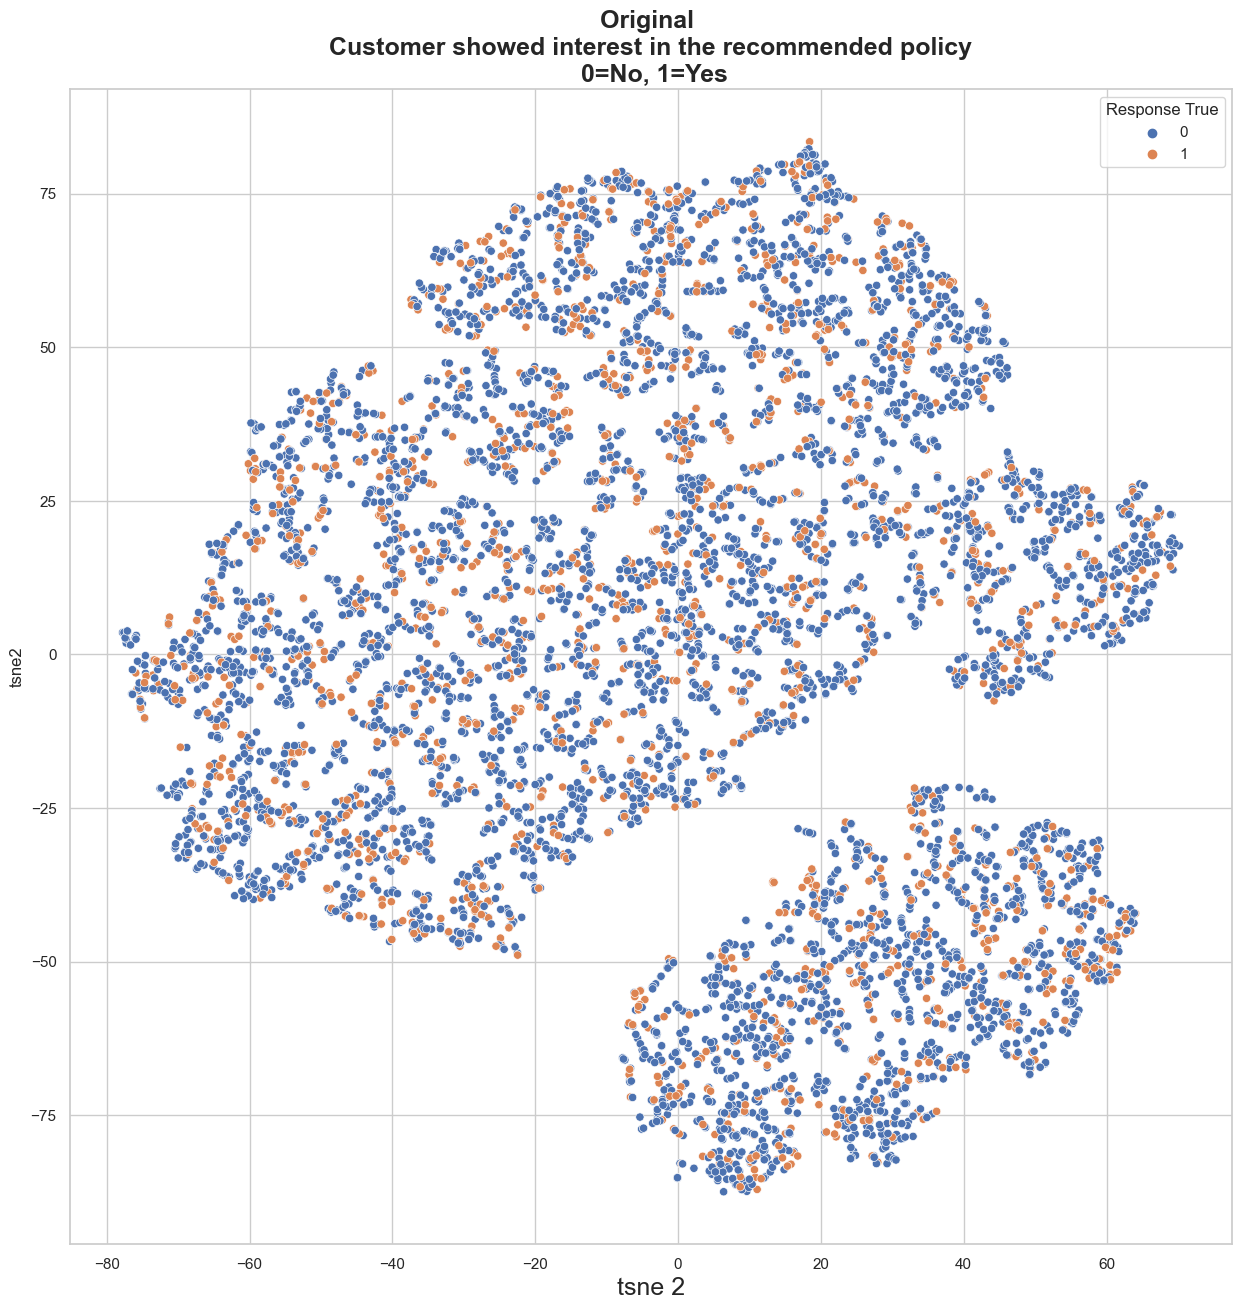

In [73]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=tabla4, x='tsne1', y='tsne2', hue='Response True')
plt.title('Original \n Customer showed interest in the recommended policy \n 0=No, 1=Yes', weight='bold', fontsize=18)
plt.xlabel('tsne 1', fontsize=18)
plt.xlabel('tsne 2', fontsize=18)

# 7. Validación del modelo

7.1 K-Fold Cross Validation

In [74]:
kf = KFold(n_splits=30)

7.2 Modelo K-Means

In [75]:
acc_modelK = []
modelK = KMeans(n_clusters=clusters, init='k-means++', max_iter=700)

for train_idx, test_idx in kf.split(x_pca):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    modelK = modelK.fit(X_train)

    acc_modelK.append(accuracy_score(y_test, modelK.predict(X_test), normalize=True)*100)

In [76]:
fold = [i+1 for i in range(len(acc_modelK))]
scoresK = pd.DataFrame(np.array([fold,acc_modelK]).T,columns=['Folds','Accuracy'])
scoresK['Folds'] = scoresK['Folds'].astype(int)
scoresK['Accuracy'] = np.round(scoresK['Accuracy'], decimals=3)
scoresK.head(15)

Folds  Accuracy
0       1    37.580
1       2    64.713
2       3    64.841
3       4    37.070
4       5    65.478
5       6    34.777
6       7    37.834
7       8    35.414
8       9    35.287
9      10    39.490
10     11    64.459
11     12    62.930
12     13    36.688
13     14    65.350
14     15    33.631

Text(0, 0.5, 'accuracy score %')

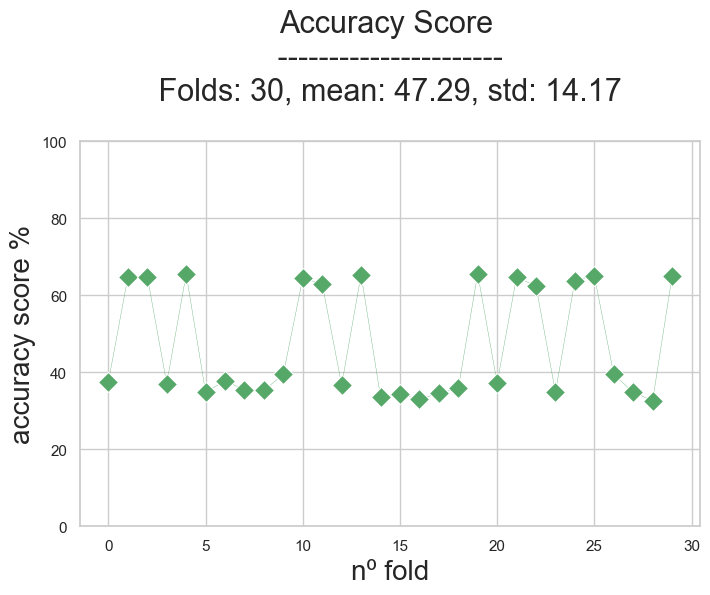

In [77]:
f, ax = plt.subplots(figsize=(8,5))
ax = sns.lineplot(data=scoresK['Accuracy'], 
                 linewidth=0.25, 
                 color="g", 
                 marker="D", 
                 dashes=True,
                 ms = 10)
ax.set(ylim=(0, 100))
ax.set_title('Accuracy Score \n ---------------------- \n Folds: %i, mean: %.2f, std: %.2f \n' %
             (len(scoresK['Accuracy']),np.mean(scoresK['Accuracy']),np.std(scoresK['Accuracy'])),fontsize=22)
ax.set_xlabel('nº fold',fontsize=20)
ax.set_ylabel('accuracy score %',fontsize=20)

7.3 Modelo Random Forest

In [78]:
acc_modelRF = []
modelRF = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10)

for train_idx, test_idx in kf.split(x_pca):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    modelRF = modelRF.fit(X_train, y_train)

    acc_modelRF.append(accuracy_score(y_test, modelRF.predict(X_test), normalize=True)*100)

In [79]:
fold = [i+1 for i in range(len(acc_modelRF))]
scoresRF = pd.DataFrame(np.array([fold,acc_modelRF]).T,columns=['Folds','Accuracy'])
scoresRF['Folds'] = scoresRF['Folds'].astype(int)
scoresRF['Accuracy'] = np.round(scoresRF['Accuracy'], decimals=3)
scoresRF.head(15)

Folds  Accuracy
0       1    75.541
1       2    77.580
2       3    77.452
3       4    75.924
4       5    74.904
5       6    76.433
6       7    74.650
7       8    76.688
8       9    75.159
9      10    75.159
10     11    78.217
11     12    77.070
12     13    74.777
13     14    74.522
14     15    75.924

Text(0, 0.5, 'accuracy score %')

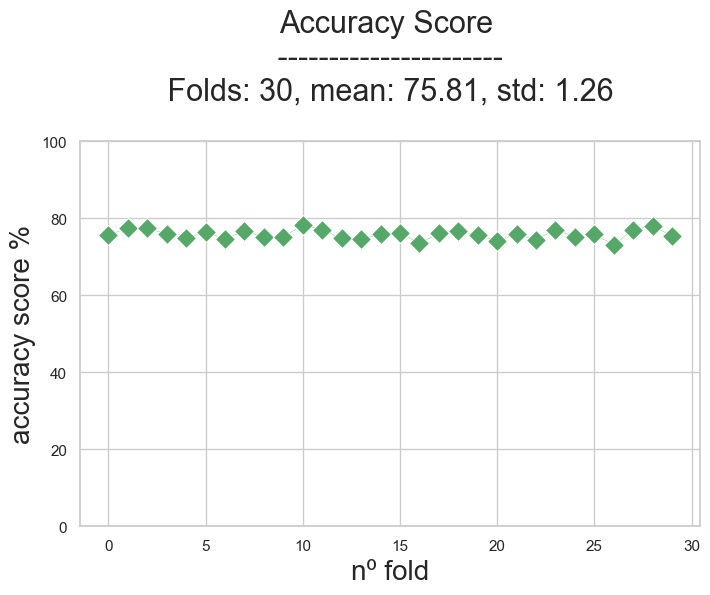

In [80]:
f, ax = plt.subplots(figsize=(8,5))
ax = sns.lineplot(data=scoresRF['Accuracy'], 
                 linewidth=0.25, 
                 color="g", 
                 marker="D", 
                 dashes=True,
                 ms = 10)
ax.set(ylim=(0, 100))
ax.set_title('Accuracy Score \n ---------------------- \n Folds: %i, mean: %.2f, std: %.2f \n' %
             (len(scoresRF['Accuracy']),np.mean(scoresRF['Accuracy']),np.std(scoresRF['Accuracy'])),fontsize=22)
ax.set_xlabel('nº fold',fontsize=20)
ax.set_ylabel('accuracy score %',fontsize=20)

# 8. Reporte

El anterior análisis logró dilucidar varios puntos con respecto a la clasificación binaria que se quería realizar a la base de datos de clientes de una compañía de seguros:

- Los datos se pueden dividir en dos grandes grupos, lo cual fue confirmado por t-SNE y K-Means
- El atributo 'Response' no es un buen clasificador, por lo que queda elegir otro candidato. Como sugerencia, un posible otro candidato podría ser el atributo 'Reco_Policy_Premium'. En el punto 4.4 se muestran indicios de algún patrón.
- El dataset esta sesgado y es necesario equilibrar los datos para mejorar el rendimiento de los modelos.

Con respecto, a los modelos aplicados:

- **K-Means** es un modelo que es mejor utilizado si es necesario encontrar grupos de clusters en un determinado set de datos, en el cual no se conoce una etiqueta. Además, al observar la métricas de evaluación, se podría decir que funciona mejor con datos no sesgados. Por otra parte, la validación del modelo mostró que dado una particular combinación de parámetros el modelo fluctua bastaste en relación a su accuracy (desviación estandar = 14.17), lo cual podemos inferir que el modelo no es muy estable en sus predicciones.

- **Random Forest** es un modelo que es mejor aplicarlo si se quiere predecir un cierto ouput en base a un determinado input. Además, si notamos las métricas de evaluación, Random Forest no es tan sensible al sesgo de datos. También, la validación del modelo indicó que dado un cierto set de parámetros el modelo se bastante estable en relación a su accuracy (desviación estándar = 1.26), por lo que sus predicciones serían más constantes.

Para el presente set de datos y dada la anterior evidencia se concluye que un modelo adecuado de clasificación binaria para este caso sería DBSCAN.
